## Business Case
### Analisis exploratorio y descriptivo de los datos

In [19]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_contacts = pd.read_csv("C:\\Users\\oridi\\Downloads\\Orbidi__Data_Analyst_Technical_Challenge\\contacts.csv")
df_events = pd.read_csv("C:\\Users\\oridi\\Downloads\\Orbidi__Data_Analyst_Technical_Challenge\\events.csv")

In [4]:
df_contacts.head().T

,0,1,2,3,4
contact_id,442452926701,442450072779,442424229102,442389583034,442244108525
created_at,2025-09-15 14:35:40.728000+00:00,2025-09-15 13:38:08.771000+00:00,2025-09-15 12:25:50.449000+00:00,2025-09-15 12:21:15.162000+00:00,2025-09-15 09:47:13.902000+00:00
utm_source,customer,customer,NaN,customer,customer
object_source,crm_ui,crm_ui,crm_ui,crm_ui,crm_ui
utm_medium,NaN,referral,NaN,referral,NaN


In [5]:
df_events.head().T

,0,1,2,3,4
hs_object_id,442594893015,403588955381,403527980229,289389101285,425308030153
lastmodified_ts,2025-09-29 08:39:29.157000+00:00,2025-08-19 08:50:46.581000+00:00,2025-08-13 08:28:06.493000+00:00,2025-08-13 02:04:40.197000+00:00,2025-09-01 06:03:31.804000+00:00
lifecyclestage,customer,customer,lead,customer,lead


In [6]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23866 entries, 0 to 23865
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contact_id     23866 non-null  int64 
 1   created_at     23866 non-null  object
 2   utm_source     21532 non-null  object
 3   object_source  23865 non-null  object
 4   utm_medium     21860 non-null  object
dtypes: int64(1), object(4)
memory usage: 932.4+ KB


In [7]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518666 entries, 0 to 518665
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   hs_object_id     518666 non-null  int64 
 1   lastmodified_ts  518666 non-null  object
 2   lifecyclestage   508449 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.9+ MB


In [8]:
print("Valores nulos events:")
print(df_events.isnull().sum())
print("\n Valores nulos contacts:")
print(df_contacts.isnull().sum())

Valores nulos events:
hs_object_id           0
lastmodified_ts        0
lifecyclestage     10217
dtype: int64

 Valores nulos contacts:
contact_id          0
created_at          0
utm_source       2334
object_source       1
utm_medium       2006
dtype: int64


In [9]:
print(f"Filas duplicadas contacts: {df_contacts.duplicated().sum()}")
print(f"Filas duplicadas contacts: {df_events.duplicated().sum()}")

Filas duplicadas contacts: 0
Filas duplicadas contacts: 0


In [10]:
# df_events
print("Valores únicos en df_events:\n")
for col in df_events.columns:
    print(f"--- {col} ---")
    print(df_events[col].unique()[:10]) 
    print(f"Total únicos: {df_events[col].nunique()}\n")

# df_contacts
print("\nValores únicos en df_contacts:\n")
for col in df_contacts.columns:
    print(f"--- {col} ---")
    print(df_contacts[col].unique()[:10])  
    print(f"Total únicos: {df_contacts[col].nunique()}\n")

Valores únicos en df_events:

--- hs_object_id ---
[442594893015 403588955381 403527980229 289389101285 425308030153
 422029018354 434355535045 419959514323 426501656797 442612116680]
Total únicos: 36299

--- lastmodified_ts ---
['2025-09-29 08:39:29.157000+00:00' '2025-08-19 08:50:46.581000+00:00'
 '2025-08-13 08:28:06.493000+00:00' '2025-08-13 02:04:40.197000+00:00'
 '2025-09-01 06:03:31.804000+00:00' '2025-09-01 06:01:02.176000+00:00'
 '2025-09-08 11:52:12.078000+00:00' '2025-08-27 12:14:37.978000+00:00'
 '2025-09-17 13:23:05.101000+00:00' '2025-09-17 13:26:55.955000+00:00']
Total únicos: 494496

--- lifecyclestage ---
['customer' 'lead' 'marketingqualifiedlead' 'subscriber' nan '155548387']
Total únicos: 5


Valores únicos en df_contacts:

--- contact_id ---
[442452926701 442450072779 442424229102 442389583034 442244108525
 442450794690 442387580122 442387577019 442390428910 442424207569]
Total únicos: 23866

--- created_at ---
['2025-09-15 14:35:40.728000+00:00' '2025-09-15 13:38:

In [11]:
df_events['lifecyclestage'].value_counts()

lifecyclestage
customer                  205917
marketingqualifiedlead    158093
lead                      135418
subscriber                  8819
155548387                    202
Name: count, dtype: int64

### Analisis de distribucion

C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\4030125635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")


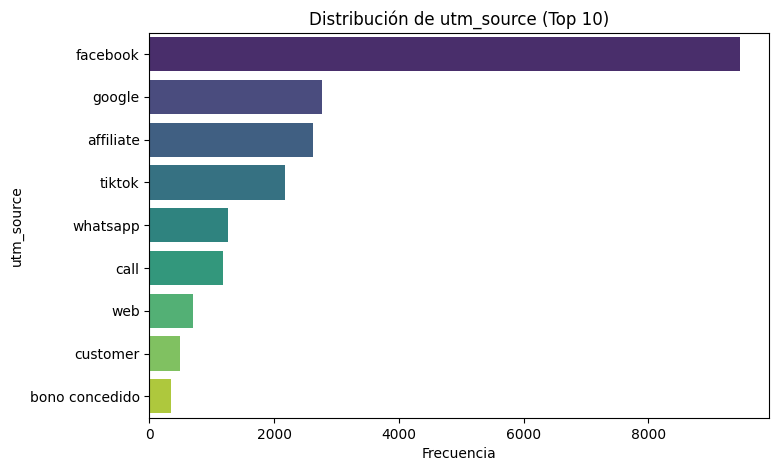

C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\4030125635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")


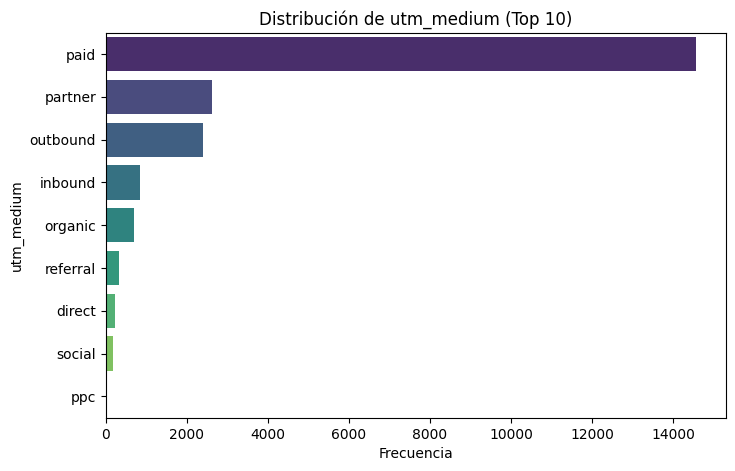

C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\4030125635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")


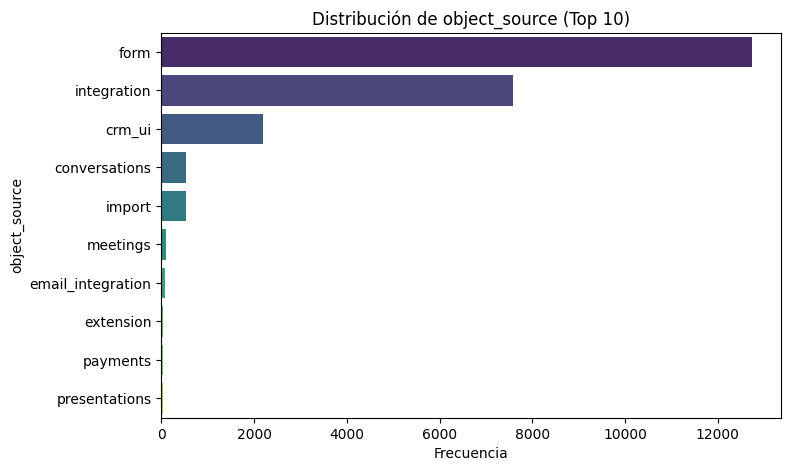

In [20]:
# Distribución de categorías

def plot_categorical_distribution(df, column, top_n=10):
    counts = df[column].value_counts(dropna=False).head(top_n)
    plt.figure(figsize=(8,5))
    sns.barplot(x=counts.values, y=counts.index, palette="viridis")
    plt.title(f"Distribución de {column} (Top {top_n})")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.show()

for col in ["utm_source", "utm_medium", "object_source"]:
    if col in df_contacts.columns:
        plot_categorical_distribution(df_contacts, col)
        

C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\4030125635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")


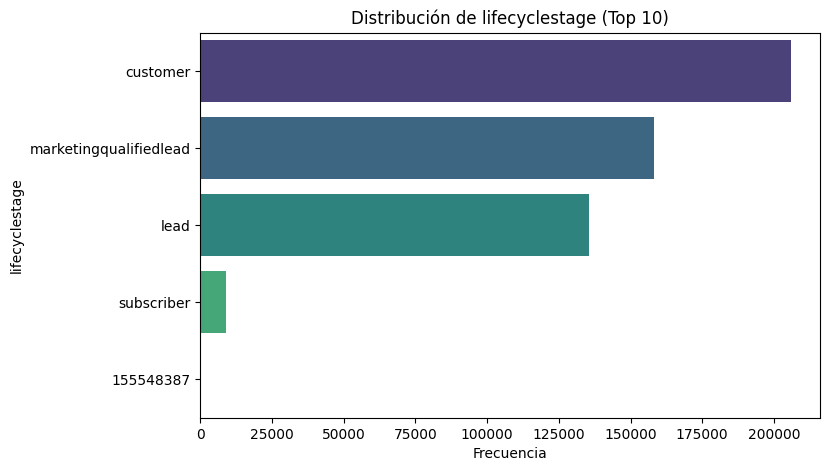

None


In [21]:
print(plot_categorical_distribution(df_events,column ="lifecyclestage"))

In [15]:
#formatos mixtos en fechas
df_contacts["created_at"] = pd.to_datetime(df_contacts["created_at"], errors="coerce", format="mixed")
df_events["lastmodified_ts"] = pd.to_datetime(df_events["lastmodified_ts"], errors="coerce", format="mixed")

# todo a UTC
df_contacts["created_at"] = df_contacts["created_at"].dt.tz_convert("UTC")
df_events["lastmodified_ts"] = df_events["lastmodified_ts"].dt.tz_convert("UTC")

# Verificamos si hay fechas que quedaron como nan
print("Fechas no convertidas en df_contacts:", df_contacts["created_at"].isna().sum())
print("Fechas no convertidas en df_events:", df_events["lastmodified_ts"].isna().sum())


Fechas no convertidas en df_contacts: 0
Fechas no convertidas en df_events: 0


C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\1798287267.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_contacts["created_month"] = df_contacts["created_at"].dt.to_period("M")


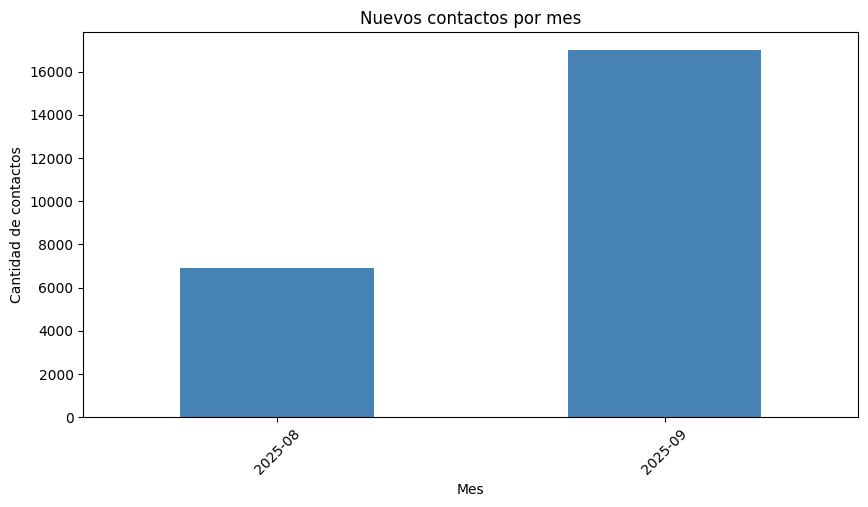

C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\1798287267.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_events["modified_month"] = df_events["lastmodified_ts"].dt.to_period("M")


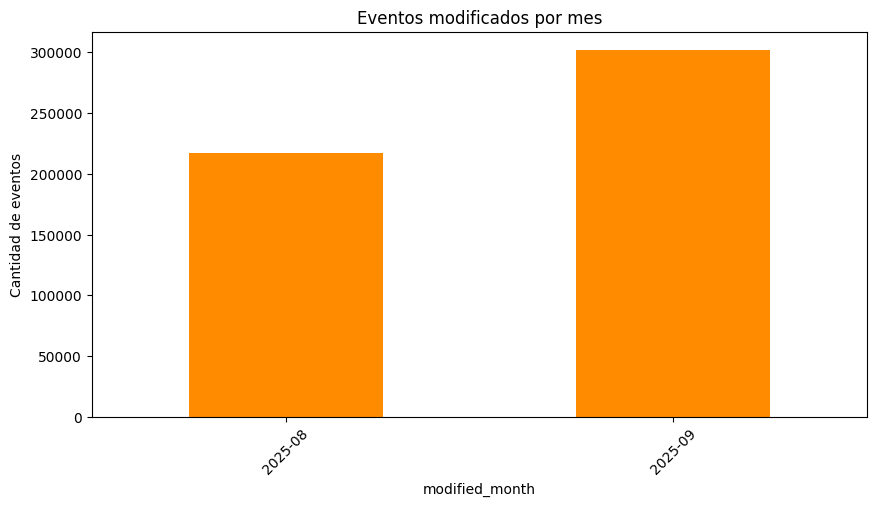

C:\Users\oridi\AppData\Local\Temp\ipykernel_48116\1798287267.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_events["modified_week"] = df_events["lastmodified_ts"].dt.to_period("W")


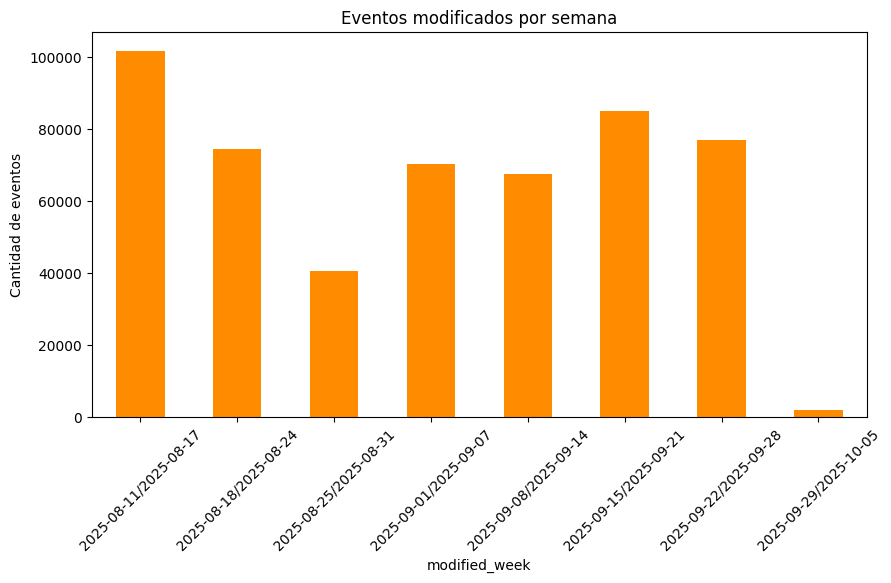

In [24]:
# Análisis temporal

# creación de contactos por mes
df_contacts["created_month"] = df_contacts["created_at"].dt.to_period("M")
contacts_monthly = df_contacts.groupby("created_month").size()

plt.figure(figsize=(10,5))
contacts_monthly.plot(kind="bar", color="steelblue")
plt.title("Nuevos contactos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de contactos")
plt.xticks(rotation=45)
plt.show()

# eventos modificados por mes
df_events["modified_month"] = df_events["lastmodified_ts"].dt.to_period("M")
events_monthly = df_events.groupby("modified_month").size()

plt.figure(figsize=(10,5))
events_monthly.plot(kind="bar", color="darkorange")
plt.title("Eventos modificados por mes")
plt.ylabel("Cantidad de eventos")
plt.xticks(rotation=45)
plt.show()

# eventos modificados por semana
df_events["modified_week"] = df_events["lastmodified_ts"].dt.to_period("W")
events_monthly = df_events.groupby("modified_week").size()

plt.figure(figsize=(10,5))
events_monthly.plot(kind="bar", color="darkorange")
plt.title("Eventos modificados por semana")
plt.ylabel("Cantidad de eventos")
plt.xticks(rotation=45)
plt.show()
